# Data modelling and model building

Building data models to predict pollution

## Data loading and preparation

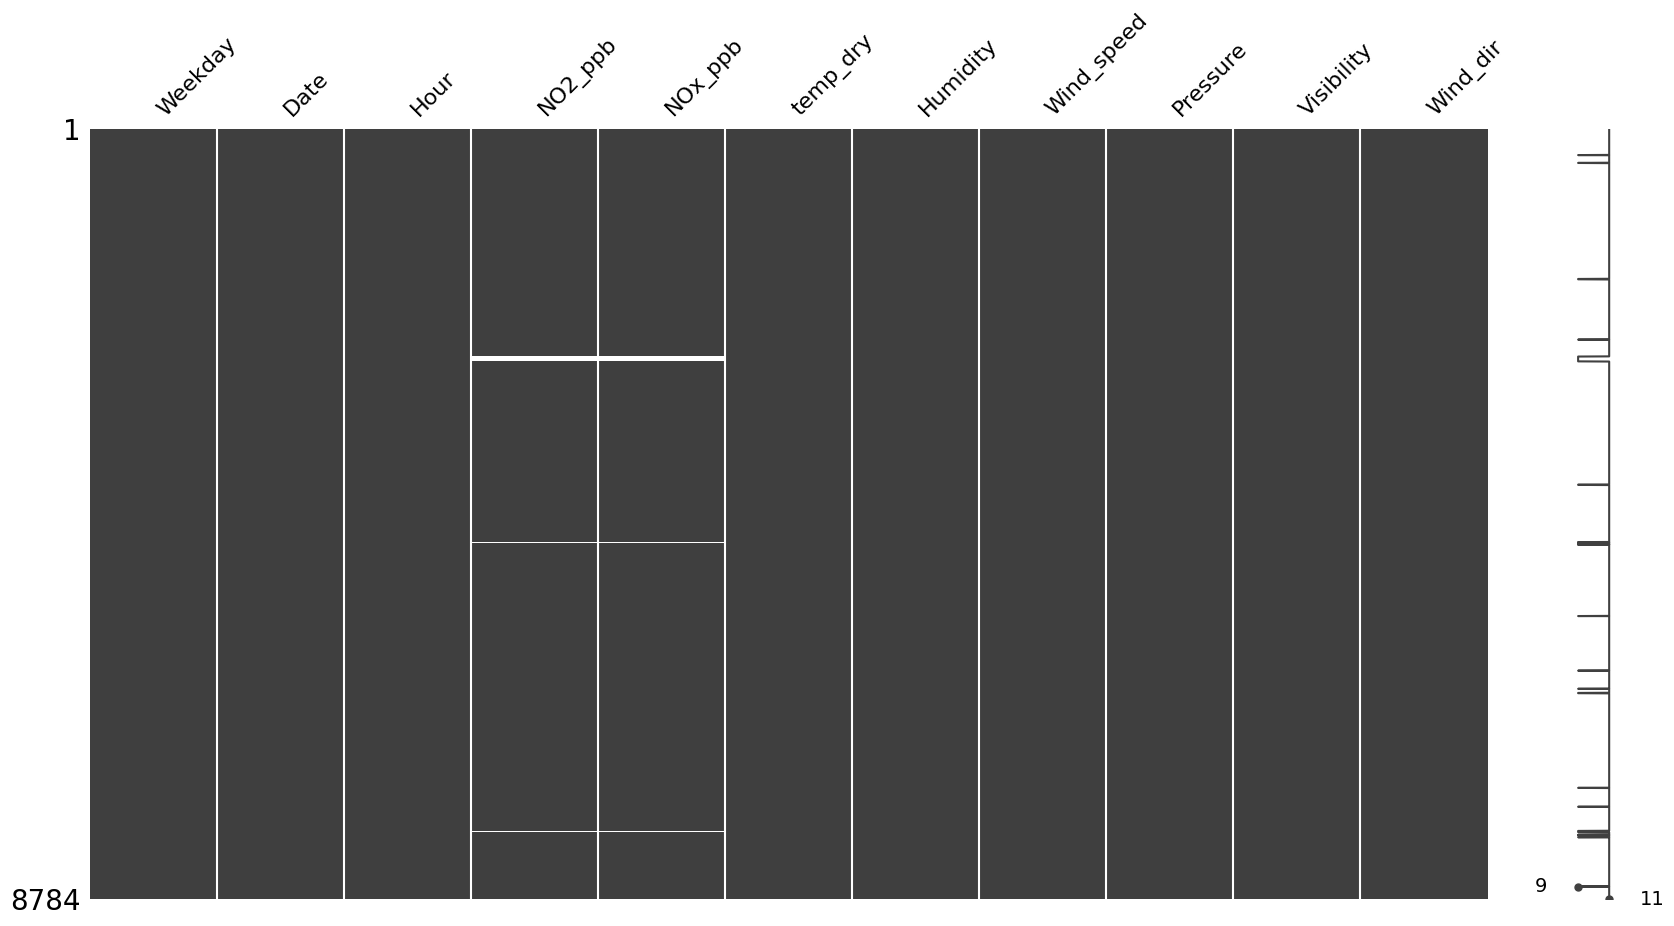

In [6]:
import pandas as pd
# Load the data
data = pd.read_csv('../Combined data/combined_data_hourly_2020.csv')

# Visualize the missing data
import missingno as msno
import matplotlib.pyplot as plt

msno.matrix(data, figsize=(20, 10))
plt.show()

In [8]:
import pandas as pd
from sklearn.linear_model import LinearRegression    # Requires package scikit-learn
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# Load the data
data = pd.read_csv('../Combined data/combined_data_hourly_2020.csv')

#X and Y 
X = data[['temp_dry','Humidity','Wind_speed','Pressure','Visibility','Wind_dir']]  
y = data['NO2_ppb'] 

# Split the data into training and testing sets
split_index = int(len(X) * 0.8)

# Chronological split
X_train, X_test = X.iloc[:split_index], X.iloc[split_index:]
y_train, y_test = y.iloc[:split_index], y.iloc[split_index:]

# Impute NA values with the mean of each column
X_train.fillna(X_train.mean(), inplace=True)
X_test.fillna(X_test.mean(), inplace=True)
y_train.fillna(y_train.mean(), inplace=True)
y_test.fillna(y_test.mean(), inplace=True)

# Create and train the linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")



Mean Squared Error: 8.26825394326849


C:\Users\Jonas\AppData\Local\Temp\ipykernel_27520\667681939.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.fillna(X_train.mean(), inplace=True)
C:\Users\Jonas\AppData\Local\Temp\ipykernel_27520\667681939.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.fillna(X_test.mean(), inplace=True)


XGBOOST!!!

In [6]:
import xgboost as xgb
import numpy as np
from xgboost import XGBRegressor  # or XGBClassifier for classification
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.model_selection import TimeSeriesSplit

tscv = TimeSeriesSplit(n_splits=12)

for train_idx, val_idx in tscv.split(X_train):
    X_t, X_val = X_train.iloc[train_idx], X_train.iloc[val_idx]
    y_t, y_val = y_train.iloc[train_idx], y_train.iloc[val_idx]

    model = XGBRegressor(n_estimators=100, learning_rate=0.1, max_depth=4)
    model.fit(X_t, y_t)

    val_pred = model.predict(X_val)
    mse_scores = mean_squared_error(y_val, val_pred)
    print(f"Fold MSE: {mean_squared_error(y_val, val_pred):.2f}")

# Print average MSE
avg_mse = np.mean(mse_scores)
print(f"\nAverage MSE across folds: {avg_mse:.2f}")

Fold MSE: 15.56
Fold MSE: 16.07
Fold MSE: 42.91
Fold MSE: 10.90
Fold MSE: 18.08
Fold MSE: 8.34
Fold MSE: 4.70
Fold MSE: 4.88
Fold MSE: 4.77
Fold MSE: 16.33
Fold MSE: 16.69
Fold MSE: 12.73

Average MSE across folds: 12.73
